In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize #for pixel value 0 to 1
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# creating CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4321 - accuracy: 0.7969 - val_loss: 0.5002 - val_accuracy: 0.7520
Epoch 2/10
625/625 [==============================] - 69s 109ms/step - loss: 0.3744 - accuracy: 0.8278 - val_loss: 0.4530 - val_accuracy: 0.7844
Epoch 3/10
625/625 [==============================] - 65s 104ms/step - loss: 0.3041 - accuracy: 0.8680 - val_loss: 0.4786 - val_accuracy: 0.7740
Epoch 4/10
625/625 [==============================] - 64s 102ms/step - loss: 0.2459 - accuracy: 0.8938 - val_loss: 0.7276 - val_accuracy: 0.7562
Epoch 5/10
625/625 [==============================] - 66s 105ms/step - loss: 0.1782 - accuracy: 0.9244 - val_loss: 0.6692 - val_accuracy: 0.8112
Epoch 6/10
625/625 [==============================] - 68s 107ms/step - loss: 0.1355 - accuracy: 0.9433 - val_loss: 0.4828 - val_accuracy: 0.8264
Epoch 7/10
625/625 [==============================] - 67s 106ms/step - loss: 0.1049 - accuracy: 0.9554 - val_loss: 0.6962 - val_ac

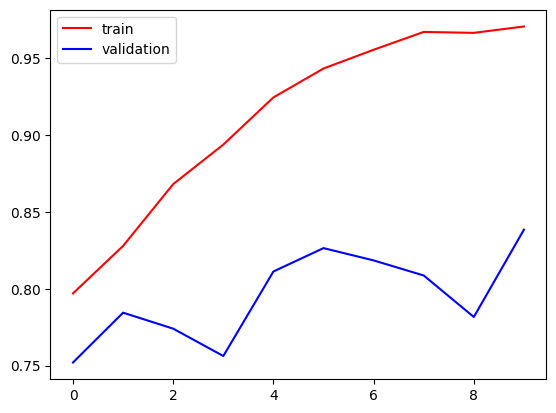

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

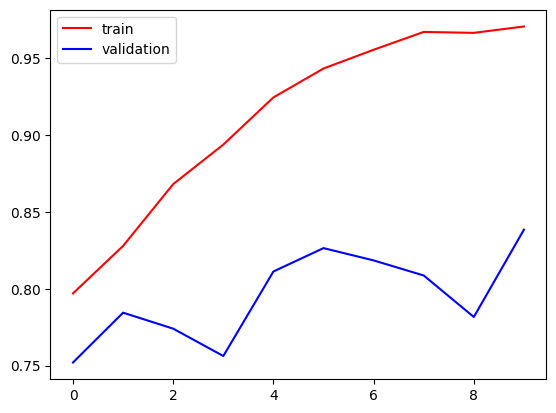

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [32]:
import cv2 #Open CV for IMG detect

In [ ]:
#For Cat

In [33]:
test_img = cv2.imread('/content/cat.jpg')

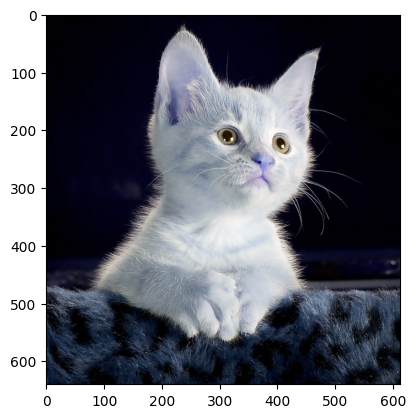

In [36]:
plt.imshow(test_img)

In [37]:
test_img.shape

(640, 612, 3)

In [38]:
test_img = cv2.resize(test_img,(256,256))

In [39]:
test_input = test_img.reshape((1,256,256,3))

In [40]:
model.predict(test_input)

1/1 [==============================] - 0s 22ms/step


array([[0.]], dtype=float32)

In [ ]:
#For Dog

In [41]:
test_img = cv2.imread('/content/dog.jpg')

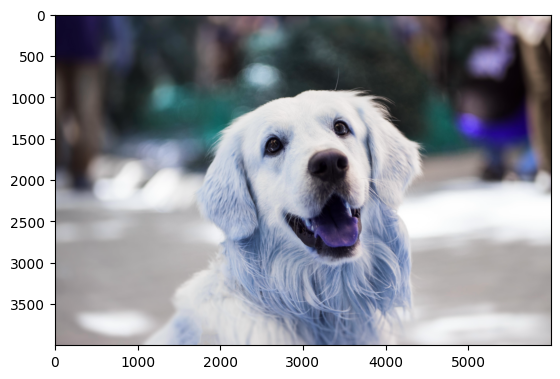

In [42]:
plt.imshow(test_img)

In [43]:
test_img.shape

(4000, 6000, 3)

In [44]:
test_img = cv2.resize(test_img,(256,256))

In [45]:
test_input = test_img.reshape((1,256,256,3))

In [46]:
model.predict(test_input)

1/1 [==============================] - 0s 20ms/step


array([[1.]], dtype=float32)